In [ ]:
# In this notebook, we explore the kaggle used automobiles dataset 

#Anaconda has inbuilt libraries for data science so we don't need to import a lot of the libraries used for this analysis

In [4]:
#let's install the Kaggle api which makes it easier to download kaggle datasets. 

!pip install kaggle
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_file('toramky/automobile-dataset',
                             file_name='Automobile_data.csv')

False

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
# we see some missing values. Let's replace it with NaN
df.replace("?", np.nan, inplace = True)
df.head(5)
# now let us examine which column is missing how many values
missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [8]:
# Replace the NaN values with average for that column.
avg_norm_loss =df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

# Let us drop the rows with NaN in "price" column.
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
#Convert datatypes to proper formats
df[["bore", "stroke","price","peak-rpm"]] = df[["bore", "stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

In [11]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [12]:
#Let us normalize the length, height and width variables
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

Text(0.5, 1.0, 'horsepower bins')

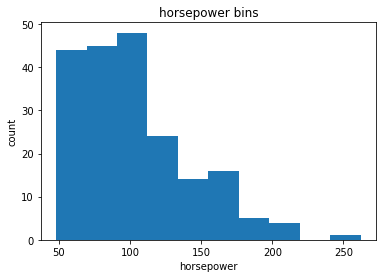

In [29]:
#Now let us look at the histogram of horsepowers
df["horsepower"]=df["horsepower"].astype(int, copy=True)
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [30]:
#The plot above does not give a clear picture. Let us change the bins to 3 different categories. 
#To create bins of 3 equal sizes, we divide the range of horsepower by 4 (4 splits will create 3 groups)
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Text(0.5, 1.0, 'horsepower bins')

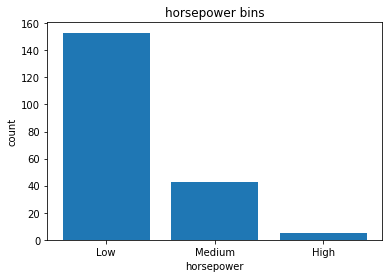

In [34]:
#Now let us plot this as a bar graph
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [36]:
#The goal of this exercise is to see what factors have most impact on price. So, let us now examine.
#Correlation between different columns
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,4.662638e-01,-0.535987,-4.749890e-02,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.075441,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000e+00,-0.056661,8.215342e-17,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.090998,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-5.666124e-02,1.000000,2.582798e-01,0.814507,0.590742,0.782097,0.572027,0.493244,0.156069,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642
length,-0.047499,8.215342e-17,0.258280,1.000000e+00,0.196016,0.084947,0.184219,0.309035,0.124101,0.022591,-0.038307,0.152902,-0.091578,-0.123374,-0.152761,0.247554
width,-0.242423,8.680206e-02,0.814507,1.960160e-01,1.000000,0.306002,0.866201,0.729436,0.544885,0.095317,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-3.737370e-01,0.590742,8.494730e-02,0.306002,1.000000,0.307581,0.074694,0.180449,0.057491,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,9.940425e-02,0.782097,1.842194e-01,0.866201,0.307581,1.000000,0.849072,0.644060,0.065703,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,1.123600e-01,0.572027,3.090345e-01,0.729436,0.074694,0.849072,1.000000,0.572609,0.036534,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-2.986248e-02,0.493244,1.241010e-01,0.544885,0.180449,0.644060,0.572609,1.000000,-0.252242,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.075441,9.099828e-02,0.156069,2.259056e-02,0.095317,0.057491,0.065703,0.036534,-0.252242,1.000000,0.085474,-0.058104,-0.007958,0.088257,0.087804,-0.029076


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


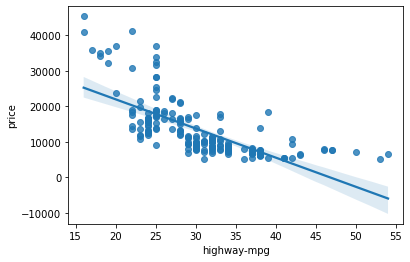

In [38]:
#Relationship between highway-mpg and price
import seaborn as sns
sns.regplot(x="highway-mpg", y="price", data=df)
df[['highway-mpg', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


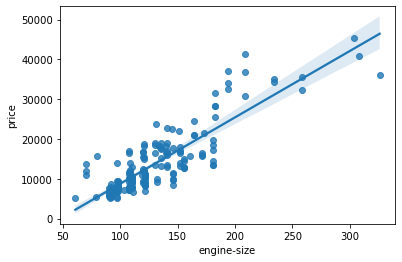

In [39]:
#Relationship between engine size and price
sns.regplot(x="engine-size", y="price", data=df)
df[['engine-size', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


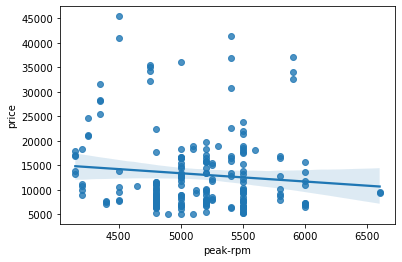

In [40]:
#Relationship between peak=rpm and price
sns.regplot(x="peak-rpm", y="price", data=df)
df[['peak-rpm','price']].corr()

<AxesSubplot:xlabel='body-style', ylabel='price'>

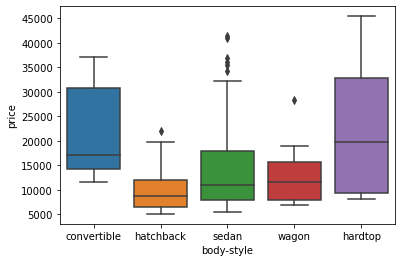

In [41]:
# Does not appeaer to be a strong correlation. Infact we can see that the coeffecient is very low. 
# Let us look at the impact of some other variables
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

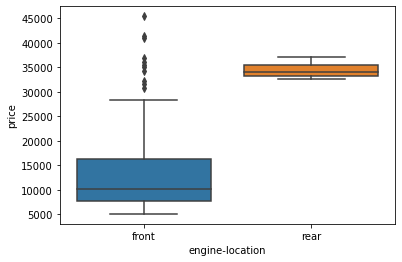

In [42]:
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

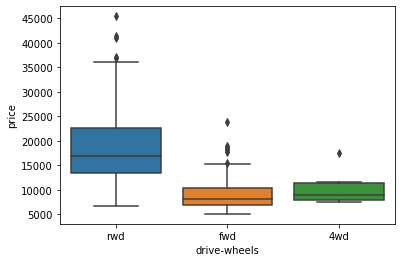

In [43]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [44]:
#For object variable type, we can see how many different values they have using method value_counts()
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [45]:
#Let us convert this to dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [47]:
# now let us give it proper column names
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels' : 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [48]:
# same with engine location
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


In [50]:
# The above informaion is good to know but not exactly helpful. 
# Creating a dataframe of drive-wheels, body style and price. 
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [54]:
df_group1 = df[['drive-wheels','body-style','price']]
group_test1 = df_group1.groupby(['drive-wheels','body-style'],as_index=False).mean()
group_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [55]:
pivot1 = group_test1.pivot(index='drive-wheels',columns='body-style')
pivot1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [58]:
#fill missing values with 0
pivot1 = pivot1.fillna(0) 
pivot1 = pivot1.round(decimals=2)
pivot1

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  0.0      0.00   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

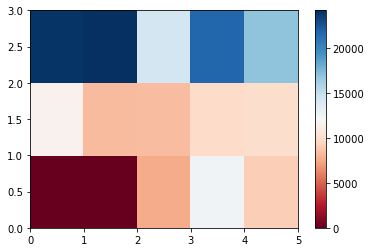

In [60]:
# Heatmap to visualize the relationship between body style vs price

import matplotlib.pyplot as plt
%matplotlib inline 

plt.pcolor(pivot1, cmap='RdBu')
plt.colorbar()
plt.show()

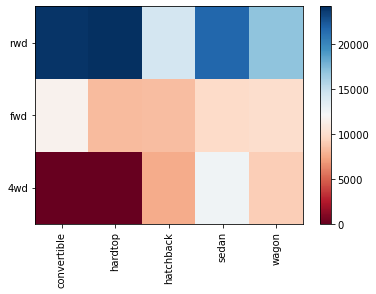

In [63]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot1, cmap='RdBu')

#label names
row_labels = pivot1.columns.levels[1]
col_labels = pivot1.index

#center x and y ticks
ax.set_xticks(np.arange(pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [65]:
# p-value 
# The P-value is the probability value that the correlation between these two variables is statistically significant. 
# Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the 
# variables is significant. 

# p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
# the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
# the p-value is  <  0.1: there is weak evidence that the correlation is significant.
# the p-value is  >  0.1: there is no evidence that the correlation is significant.
    
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)  


The Pearson Correlation Coefficient is 0.5846418222655081 with a P-value of P = 8.076488270732989e-20


In [66]:
# This means that the correlation is statistically significant (p-value < .001)
# However the pearson coeff is 0.5846 which suggests that the linear relationship is not very strong

# Now let's look at horsepower
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054 with a P-value of P =  6.273536270650504e-48


In [72]:
# Statistically significant and the Relationship is quite strong (~0.80, close to 1)

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185 with a P-value of P = 9.265491622198389e-64


In [73]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846 with a P-value of P =  2.1895772388936914e-53


In [74]:
# ANOVA: Analysis of variance
# F-test score: ANOVA assumes the means of all groups are the same, 
# calculates how much the actual means deviate from the assumption, and reports it as the F-test score. 
# A larger score means there is a larger difference between the means.
# P-value: P-value tells how statistically significant our calculated score value is.

grouped_test2=df_group1[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [75]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [81]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], 
                              grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23
